# Introduction aux méthodes de clustering

## 1. Généralités

Le ___clustering___, appelé parfois _partionnement de données_ en français, est une méthode statistique qui a comme but de grouper un ensemble d'individu ensemble de sorte que __les individus dans le même groupe se ressemblent plus__ que les individus en dehors du groupe.

Cette ressemblance peut être définie de plusieurs façons qui est défini au moment de procéder au clustering, en fonction des spécificités des données et des objectifs. Il s'agit dans tous les cas d'une __mesure de similarité__ entre individus.

La corrélation peut par exemple être utilisée comme mesure de similarité. Une mesure de similarité peut être transformée en __mesure de dissimilarité__. Une __distance__ est un cas spécial de mesure de dissimilarité qui satisfait l'inégalité triangulaire.

Parmi les méthodes de clustering les plus populaires, on trouve le __k-means__ et __la classification hiérarchique__.

### 1.1 Clustering ou classification?

Malgré le fait que la classification hiérarchique fait partie des méthodes étudiées nous allons utiliser le terme de __clustering__ plutôt que de classification. En effet, en machine learning, on distingue le clustering de la classification. Mais en quoi c'est différent?

Le __clustering est une méthode non-supervisée__ (unsupervised). Dans une méthode non-supervisée, les groupes (classes) qui en résultent ne sont pas définis en avance. Les groupes sont crés uniquement sur la base des valeurs de l'ensemble des individus, sans autres données à priori.

La __classification est une méthode supervisée__ (supervised). Dans ce cas, les classes (groupes) qui en résultent sont définis en avance. En conséquence, nous avons à disposition les valeurs numériques et l'indication d'appartenance à une certaine classe, au moins pour une partie des données. Un exemple classique d'une classification est de trouver l'utilisation du sol à partir d'images satellites.

## 2. Méthodes de clustering

L'objectif du clustering est de trouver des groupes cohérentes d'individus qui se ressemblent. Cet objectif est relativement vague, et les notions de groupe cohérente et de ressemblance entre individus peuvent être traduites en mesures statistiques de multiples façons. Aussi la mesure de qualité si le résultat d'un clustering est bon ou non est difficile, car pas clairement définie.

Ceci fait que le nombre de méthodes de clustering est très élevé, avec des approches très diverses. Nous allons voir ici 2 méthodes différentes.

### 2.1 Le k-means

La méthode du k-means est probablement la méthode la plus populaire pour le clustering. Avec cet algorithme, le nombre de clusters $k$ doit être défini en avance.

Supposons nous avons un jeu de données avec $m$ variables et $n$ individus. L'algorithme standard de k-means définit $k$ centres de clusters dans l'espace à $m$ dimensions, et attribue chacun des $n$ individus au centre le plus proche, basé sur la distance euclidienne à $m$ dimensions. Le choix initial des $k$ centres est fait de manière plus ou moins aléatoire.

Puis itérativement, cette partition est modifiée afin d'obtenir un résultat optimal où la variance intra-groupe devient minimale. Concrètement, les $k$ centres sont déplacés à chaque itération pour correspondre au centroïde des individus du groupe. Le centroïde est simplement la moyenne des valeurs des individus du groupe (d'où le nom k-means).

Dans R, nous pouvons calculer le k-means avec la fonction `kmeans`. Pour la démonstration, nous utilisons les mêmes données que pour l'ACP:

In [1]:
d = read.csv(file="zh-acp-mobilite.tsv", sep="\t")

In [2]:
head(d, 3)

Z05,NAME,PTOT,NON_PEND,INTRA_COM_PEND,INTER_COM_PEND,PEND_MD,PEND_AUTO,PEND_TP,AGE_0_19,⋯,REV_150K_PLUS,BATI_BAS,BATI_HAUT,FOY_1_PERS,FOY_COUPLES,FOY_ENF,FOY_GRANDS_ENF,FOY_MONO_ENF,FOY_MULTI,FOY_COLOC
1.0,Reppischtal,5214,0.08819346,0.0682788,0.8435277,0.01373980,0.6363246,0.3499356,0.2332183,⋯,0.06069854,0.8816442,0.1183558,0.2805722,0.3174896,0.3041071,0.02399631,0.05906784,0.005076142,0.02168897
2.1,Affoltern am Albis Zentrum,7295,0.03354298,0.2348008,0.7316562,0.08829282,0.4786253,0.4330819,0.2032899,⋯,0.01718427,0.7845912,0.2154088,0.3580201,0.2989928,0.2361094,0.03322142,0.04508621,0.008305355,0.01690733
2.2,Affoltern am Albis-Zwillikon Hedingen,6666,0.07382185,0.1190411,0.8071370,0.03348214,0.5360332,0.4304847,0.2412241,⋯,0.03502674,0.8898590,0.1101410,0.3359182,0.2883327,0.2876278,0.02855129,0.05216778,0.002819880,0.01797674


Sélectionner les variables à inclure dans le clustering:

In [5]:
d_sel = d[, 4:33]

Et faire 6 groupes avec le k-means:

In [6]:
z05_clusters = kmeans(d_sel, 6, nstart=20)

Le paramètre `nstart` donne le nombre de tentatives au niveau de la configuration initiale des centres. On a vu en haut que cette configuration initiale est faite de manière plus ou moins aléatoire. Ceci peut donc avoir une influence sur le résultat final. En conséquence, il est une bonne idée d'essayer plusieurs fois et de sélectionner le meilleur résultat. R le fait automatiquement si on spécifie ce paramètre.

L'information sur le résultat peut être affiché à l'écran:

In [9]:
print(z05_clusters)

K-means clustering with 6 clusters of sizes 30, 42, 37, 84, 34, 18

Cluster means:
    NON_PEND INTRA_COM_PEND INTER_COM_PEND    PEND_MD PEND_AUTO   PEND_TP
1 0.07505957      0.1236316      0.8013088 0.03200518 0.5045852 0.4634096
2 0.04212391      0.1724200      0.7854560 0.05283271 0.4702331 0.4769342
3 0.03642619      0.6564261      0.3071477 0.04981474 0.2670417 0.6831435
4 0.06696501      0.1214033      0.8116317 0.03745189 0.6135014 0.3490467
5 0.05148269      0.6664742      0.2820431 0.10620445 0.1531871 0.7406085
6 0.04302858      0.4401352      0.5168362 0.10922864 0.3681880 0.5225834
   AGE_0_19 AGE_20_39 AGE_40_64 AGE_65_PLUS   EDU_PRE   EDU_BAS   EDU_MOY
1 0.2099229 0.2175604 0.3804284   0.1920883 0.1566290 0.1605945 0.4798031
2 0.1996771 0.3034583 0.3396738   0.1571908 0.1481941 0.2550746 0.4833185
3 0.1865165 0.3129528 0.3187153   0.1818153 0.1454360 0.2440760 0.4375569
4 0.2232802 0.2466400 0.3783470   0.1517327 0.1641596 0.1959059 0.5344669
5 0.1479105 0.3872800 0.33151

Nous pouvons sortir l'ID du groupe, dans le même ordre que le jeu de données initial:

In [10]:
z05_clusters$cluster

[1] 4 2 4 4 4 4 4 1 4 4 4 4 4 4 2 2 4 4 4 4 4 4 4 2 2 4 4 4 2 2 4 4 4 2 4 4 4
 [38] 4 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 1 4 4 1 1 4 4 2 4 2 4 2 2 2 4 2 2 2 4 1 4
 [75] 1 2 1 1 2 1 1 2 4 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 2 2 4 4 4 4 2 2
[112] 4 2 4 1 4 4 4 1 4 2 2 4 4 2 2 1 4 2 2 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 3
[149] 6 6 6 6 6 6 6 6 6 6 6 4 1 2 2 2 2 4 4 2 2 2 2 1 4 2 4 5 5 5 3 3 3 5 5 5 5
[186] 5 3 5 3 3 5 5 3 3 5 5 5 5 5 3 5 5 5 5 5 5 3 3 5 5 5 3 3 3 3 3 3 3 3 3 3 5
[223] 5 5 5 3 3 3 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3

Le __within cluster sum of squares__ (WSS) donne une indication sur la qualité de la partition trouvée par le k-means. La valeur peut être entre 0 et 1 (0 et 100%). Une valeur de 84.9% indique que nous avons trouvé une bonne partition.

Cependant, il faut toujours être prudent avec les k-means car nous devons définir le nombre de groupes en avance, chose que généralement nous ne savons pas. Il est une bonne idée d'essayer avec plusieurs valeurs pour le nombre de groupes, et puis de comparer le WSS.

Voici comment on peut faire une boucle qui calcule automatiquement un k-means pour chaque nombre de groupes, et garde le WSS:

In [26]:
wss_clusters = seq(1, 20)
for (i in 1:20) {
    c = kmeans(d_sel, i, nstart=20)
    wss_clusters[i] = c$betweenss / c$totss
}

Et voilà le résultat graphique:

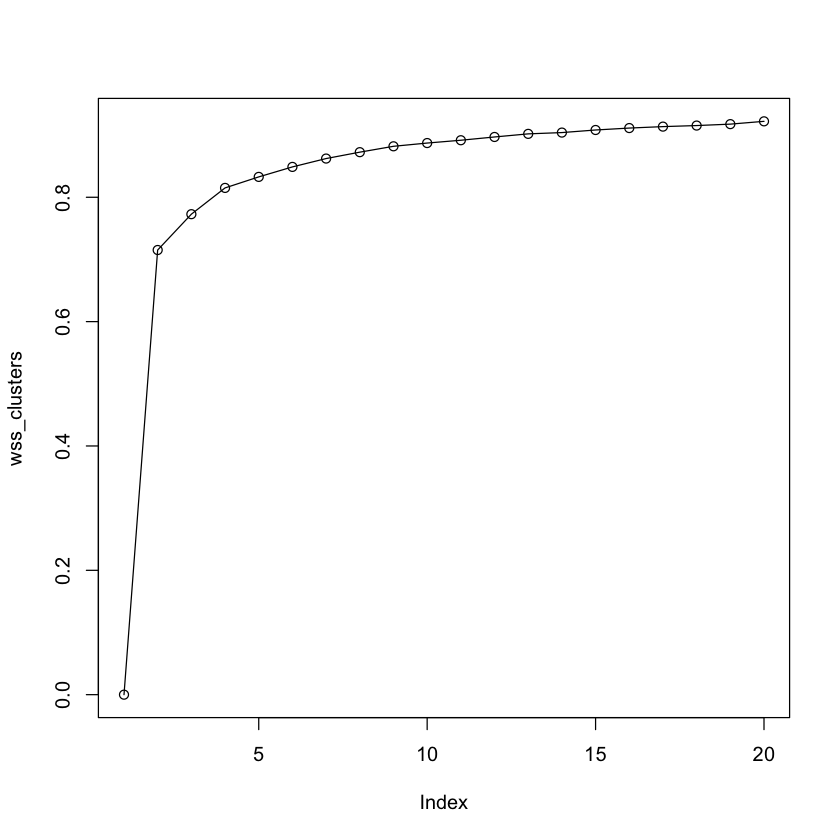

In [25]:
plot(wss_clusters, type="o")

Il faut noter que dans un tel cas il est clairement difficile de trouver le bon nombre de groupes... Nous pouvons essayer d'autres méthodes qui approchent ce problème de manière un peu différente.

### 2.2 Classification ascendante hiérarchique (CAH)

La classifiation ascendante hiérarchique construit une hiérarchie de groupes. Au début, tous les individus sont à part, et petit à petit, les individus qui se ressemblent le plus sont groupés ensemble. Ainsi, un arbre de classification, le __dendrogramme__ est construit.

Le dendrogramme permet d'inspecter visuellement la structure du jeu de données et déterminer le nombre de groupes idéal.

La CAH nécessite deux choix importants:

1. Le choix de la **mesure de la distance**. La distance la plus commune est la distance euclidienne, mais d'autres sont en principe possibles.

2. Le __critère de lien__ qui définit comment la distance entre deux clusters (ensemble d'individus) est calculée (p.ex. la distance maximale, moyenne etc.).

Dans R, le calcul de la CAH se fait en deux étapes. D'abord nous calculons la matrice des distances avec la fonction `dist`:

In [67]:
z05_dist = dist(d_sel, method="euclidean")

Et par la suite la CAH. Nous utilisons ici le critère de Ward qui est basé sur la différence de variance si les deux clusters sont réunis:

In [68]:
z05_cah = hclust(dist(d_sel), method="ward.D2")

Nous pouvons afficher l'histogramme avec la fonction `plot`. Nous n'affichons pas les 245 labels, ce serait illisible...

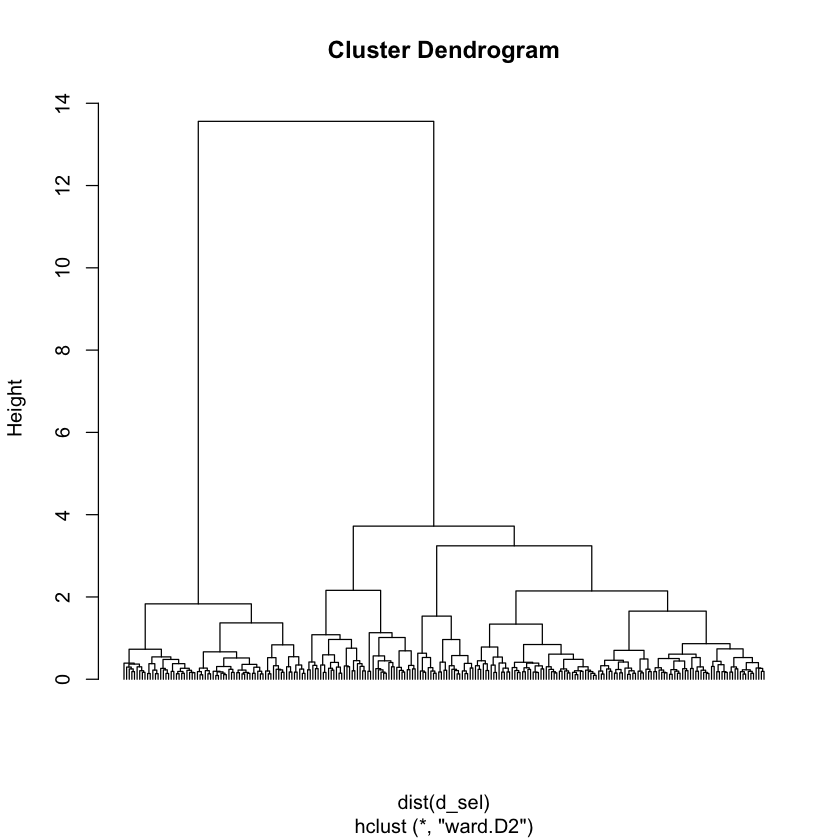

In [69]:
plot(z05_cah, labels=FALSE, hang=-0.1)

Nous pouvons couper ce dendrogramme horizontalement pour ainsi obtenir un certain nombre de classes. L'idéal dans le présent cas semble être 4 groupes. Le partionnement peut être obtenu ainsi:

In [44]:
z05_cah_partitions = cutree(z05_cah, 4)
z05_cah_partitions

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 3 1 1 1 1 2 1 1 1 1 1 2 1 2 1 3 1
 [75] 1 2 1 3 2 2 2 2 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 1 1 1 1 2 1
[112] 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 3 1 1 1 4 4 4 4 4 4 4 4 4 4
[186] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[223] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

où l'ordre est le même que dans les données initiales.

### 2.3 L'interprétation et la cartographie des clusters

Une fois que le clustering est fait, on peut cartographier les clusters facilement dans un logiciels SIG, et produire une carte en conséquence. Le choix des couleurs se fait alors en fonction de la distance entre les clusters, avec les clusters qui se rejoignent plus vite dans le dendrogramme qui obtiennent une couleur différente.

Il faut aussi interpréter les clusters, de manière un peu similaire à une ACP. C'est-à-dire il faut trouver les points similaires entre les clusters, typiquement en inspectant les valeurs des différentes variables pour les différents clusters. Il peut être une bonne idée de calculer la moyenne, écart-type etc. sur les données en fonction des clusters.

La cartographie aide souvent aussi à l'interprétation du résultat, car on connaît souvent les différentes unités spatiales typiques.

## 3. ACP + CAH

Il est assez commun de combiner une ACP avec une CAH, en faisant le clustering sur les composantes principales retenues.

Par la suite, on peut faire une cartographie des clusters en plus de la cartographie des scores factoriels.

Il est aussi possible d'utiliser le résultat de la CAH pour faire un graphique de type nuage de symboles proportionnels avec la couleur des symboles qui correspond au cluster.